#### **Task 1: Preprocess and Explore the Data**

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# Define tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

In [3]:
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

C:\Users\girmachew\AppData\Local\Temp\ipykernel_9764\315921050.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
[*********************100%***********************]  3 of 3 completed


In [9]:
# Save raw data
data.to_csv("data/raw_financial_data.csv")

OSError: Cannot save file into a non-existent directory: 'data'

In [5]:
data.head()

Ticker             SPY                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2015-07-01  175.110979  175.363874  174.124701  174.917099  135979900   
2015-07-02  175.397642  175.566234  174.335486  174.756973  104373700   
2015-07-06  173.458790  175.043573  173.256472  174.259613  117975400   
2015-07-07  174.461858  175.481849  172.059377  175.355408  173820200   
2015-07-08  174.006703  174.293311  172.177451  172.413483  164020100   

Ticker            BND                                                 TSLA  \
Price            Open       High        Low      Close   Volume       Open   
Date                                                                         
2015-07-01  60.794179  60.914456  60.764108  60.816730  5399300  18.073999   
2015-07-02  60.937008  61.027221  60.937008  60.967079  1060100  18.680000   
2015-07-06  61.222687  61.222687  61.057301  61.177578  2210700  18.591999   
2015-07-07  61.410657  61.470792  61.237751  61.237751  4183200  18.333332   
2015-07-08  61.373020  61.463233  61.312879  61.410610  1967800  17.288000   

Ticker                                                  
Price            High        Low      Close     Volume  
Date                                                    
2015-07-01  18.174667  17.856667  17.943333   31518000  
2015-07-02  18.830000  18.220667  18.667999  107458500  
2015-07-06  18.779333  18.420000  18.648001   61828500  
2015-07-07  18.346666  17.384666  17.858667   91576500  
2015-07-08  17.386667  16.954000  16.997334   93316500

In [6]:
data.columns

MultiIndex([( 'SPY',   'Open'),
            ( 'SPY',   'High'),
            ( 'SPY',    'Low'),
            ( 'SPY',  'Close'),
            ( 'SPY', 'Volume'),
            ( 'BND',   'Open'),
            ( 'BND',   'High'),
            ( 'BND',    'Low'),
            ( 'BND',  'Close'),
            ( 'BND', 'Volume'),
            ('TSLA',   'Open'),
            ('TSLA',   'High'),
            ('TSLA',    'Low'),
            ('TSLA',  'Close'),
            ('TSLA', 'Volume')],
           names=['Ticker', 'Price'])

####  Clean & Restructure Data

In [10]:
# Flatten multi-index columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]

In [11]:
data.columns

Index(['SPY_Open', 'SPY_High', 'SPY_Low', 'SPY_Close', 'SPY_Volume',
       'BND_Open', 'BND_High', 'BND_Low', 'BND_Close', 'BND_Volume',
       'TSLA_Open', 'TSLA_High', 'TSLA_Low', 'TSLA_Close', 'TSLA_Volume'],
      dtype='object')

In [12]:
data.head()

,SPY_Open,SPY_High,SPY_Low,SPY_Close,SPY_Volume,BND_Open,BND_High,BND_Low,BND_Close,BND_Volume,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_Volume
Date,,,,,,,,,,,,,,,
2015-07-01,175.110979,175.363874,174.124701,174.917099,135979900,60.794179,60.914456,60.764108,60.816730,5399300,18.073999,18.174667,17.856667,17.943333,31518000
2015-07-02,175.397642,175.566234,174.335486,174.756973,104373700,60.937008,61.027221,60.937008,60.967079,1060100,18.680000,18.830000,18.220667,18.667999,107458500
2015-07-06,173.458790,175.043573,173.256472,174.259613,117975400,61.222687,61.222687,61.057301,61.177578,2210700,18.591999,18.779333,18.420000,18.648001,61828500
2015-07-07,174.461858,175.481849,172.059377,175.355408,173820200,61.410657,61.470792,61.237751,61.237751,4183200,18.333332,18.346666,17.384666,17.858667,91576500
2015-07-08,174.006703,174.293311,172.177451,172.413483,164020100,61.373020,61.463233,61.312879,61.410610,1967800,17.288000,17.386667,16.954000,16.997334,93316500


#### Check missing values


In [14]:
missing_counts = data.isnull().sum()
missing_counts

SPY_Open       0
SPY_High       0
SPY_Low        0
SPY_Close      0
SPY_Volume     0
BND_Open       0
BND_High       0
BND_Low        0
BND_Close      0
BND_Volume     0
TSLA_Open      0
TSLA_High      0
TSLA_Low       0
TSLA_Close     0
TSLA_Volume    0
dtype: int64

#### Basic Statistics & Data Types

In [15]:
print(data.dtypes)
print(data.describe().T)

SPY_Open       float64
SPY_High       float64
SPY_Low        float64
SPY_Close      float64
SPY_Volume       int64
BND_Open       float64
BND_High       float64
BND_Low        float64
BND_Close      float64
BND_Volume       int64
TSLA_Open      float64
TSLA_High      float64
TSLA_Low       float64
TSLA_Close     float64
TSLA_Volume      int64
dtype: object
              count          mean           std           min           25%  \
SPY_Open     2535.0  3.341255e+02  1.263911e+02  1.554265e+02  2.310078e+02   
SPY_High     2535.0  3.359816e+02  1.270531e+02  1.569267e+02  2.340249e+02   
SPY_Low      2535.0  3.321146e+02  1.256613e+02  1.537585e+02  2.286617e+02   
SPY_Close    2535.0  3.341937e+02  1.264277e+02  1.558697e+02  2.300832e+02   
SPY_Volume   2535.0  8.503521e+07  4.428796e+07  2.027000e+07  5.779150e+07   
BND_Open     2535.0  6.847139e+01  4.555994e+00  6.078668e+01  6.466061e+01   
BND_High     2535.0  6.857117e+01  4.563590e+00  6.089944e+01  6.473125e+01   
BND_Low  

#### Exploratory Data Analysis (EDA)

In [16]:
import matplotlib.pyplot as plt

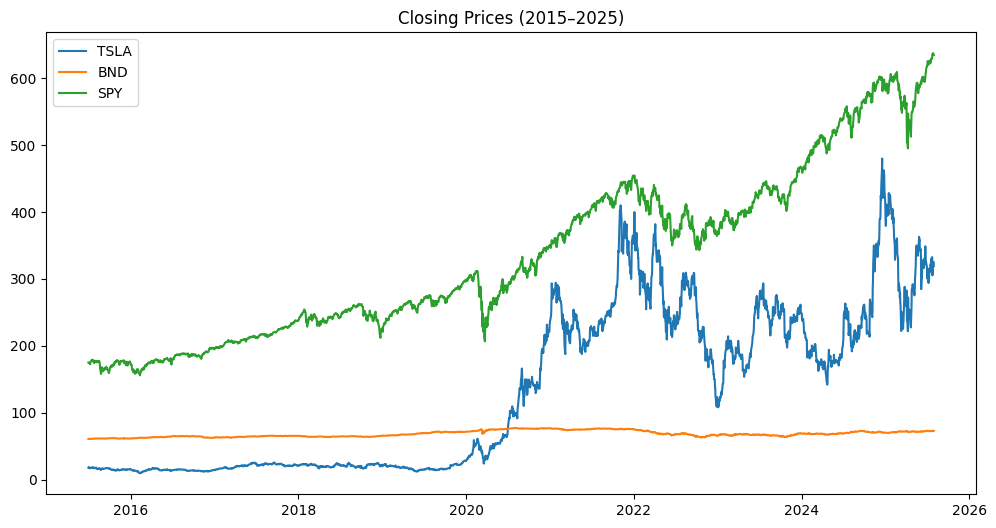

In [17]:
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data.index, data[f"{ticker}_Close"], label=ticker)
plt.legend()
plt.title("Closing Prices (2015–2025)")
plt.show()

#### Daily Returns

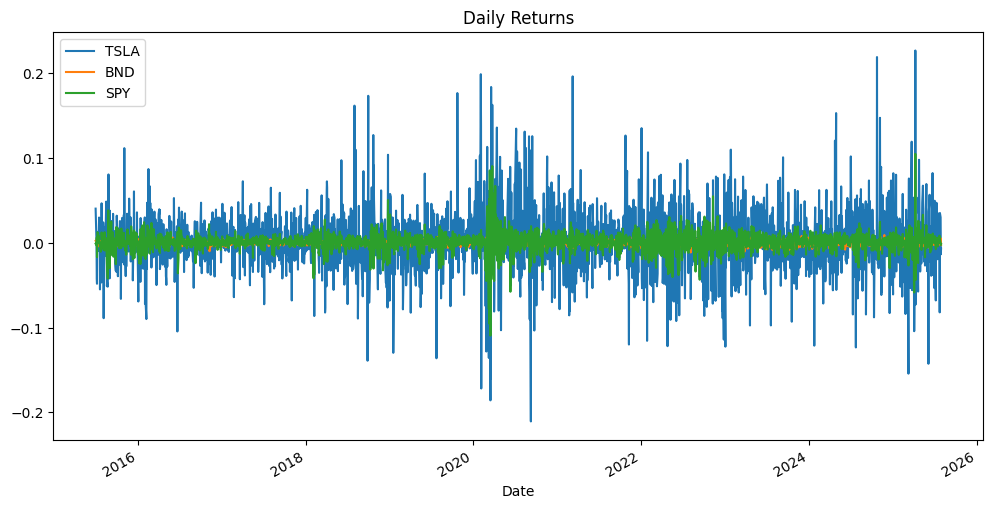

In [19]:
returns = pd.DataFrame()
for ticker in tickers:
    col_name = f"{ticker}_Adj Close" if f"{ticker}_Adj Close" in data.columns else f"{ticker}_Adj Close"
    # Adjust for yfinance multi-index structure
    if f"{ticker}_Adj Close" not in data.columns and (ticker, 'Adj Close') in data.columns:
        col_data = data[(ticker, 'Adj Close')]
    else:
        col_data = data[col_name] if col_name in data.columns else data[f"{ticker}_Close"]
    returns[ticker] = col_data.pct_change()

returns.plot(figsize=(12,6))
plt.title("Daily Returns")
plt.show()

#### Volatility (Rolling 30-day Std Dev)

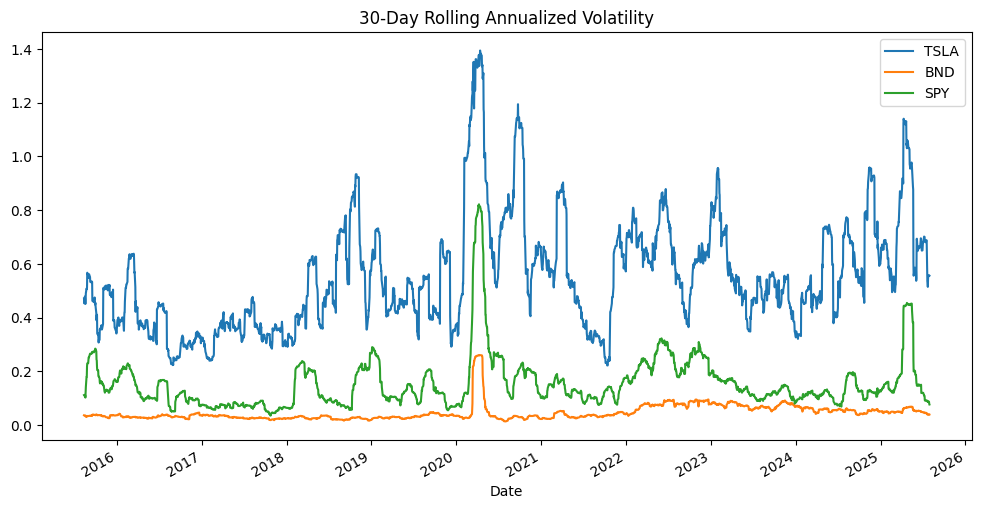

In [20]:
rolling_vol = returns.rolling(window=30).std() * (252**0.5)  # Annualized

rolling_vol.plot(figsize=(12,6))
plt.title("30-Day Rolling Annualized Volatility")
plt.show()


#### Outlier Detection

In [21]:
outliers = {}
for ticker in tickers:
    mean = returns[ticker].mean()
    std = returns[ticker].std()
    outliers[ticker] = returns[(returns[ticker] > mean + 3*std) | 
                               (returns[ticker] < mean - 3*std)]


#### Stationarity Check (ADF Test)

In [23]:
from statsmodels.tsa.stattools import adfuller

# Adjust function to handle both MultiIndex and flattened columns
def get_adj_close(df, ticker):
    if f"{ticker}_Adj Close" in df.columns:
        return df[f"{ticker}_Adj Close"]
    elif (ticker, 'Adj Close') in df.columns:
        return df[(ticker, 'Adj Close')]
    elif f"{ticker}_Close" in df.columns:
        return df[f"{ticker}_Close"]
    elif (ticker, 'Close') in df.columns:
        return df[(ticker, 'Close')]
    else:
        raise KeyError(f"Adj Close or Close column not found for {ticker}")

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic','p-value','# Lags Used','# Observations']
    out = pd.Series(result[0:4], index=labels)
    for key,val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out)
    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')
    print()

for ticker in tickers:
    adj_close_series = get_adj_close(data, ticker)
    adf_test(adj_close_series, title=ticker)


Augmented Dickey-Fuller Test: TSLA
ADF Test Statistic        -1.418872
p-value                    0.573196
# Lags Used               27.000000
# Observations          2507.000000
Critical Value (1%)       -3.432961
Critical Value (5%)       -2.862694
Critical Value (10%)      -2.567384
dtype: float64
Non-stationary

Augmented Dickey-Fuller Test: BND
ADF Test Statistic        -1.536245
p-value                    0.515511
# Lags Used               13.000000
# Observations          2521.000000
Critical Value (1%)       -3.432947
Critical Value (5%)       -2.862687
Critical Value (10%)      -2.567381
dtype: float64
Non-stationary

Augmented Dickey-Fuller Test: SPY
ADF Test Statistic         0.690813
p-value                    0.989653
# Lags Used                9.000000
# Observations          2525.000000
Critical Value (1%)       -3.432942
Critical Value (5%)       -2.862685
Critical Value (10%)      -2.567380
dtype: float64
Non-stationary



#### Risk Metrics

In [24]:
import numpy as np

# Assume 252 trading days/year and 0% risk-free rate for now
risk_free_rate = 0.00

for ticker in tickers:
    mean_return = returns[ticker].mean() * 252
    std_return = returns[ticker].std() * (252**0.5)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    var_95 = np.percentile(returns[ticker].dropna(), 5)
    print(f"{ticker} → Sharpe Ratio: {sharpe_ratio:.2f}, VaR(95%): {var_95:.4f}")


TSLA → Sharpe Ratio: 0.78, VaR(95%): -0.0547
BND → Sharpe Ratio: 0.36, VaR(95%): -0.0049
SPY → Sharpe Ratio: 0.79, VaR(95%): -0.0172
